<h1><font size=5 color=black> $Projet \space de \space Statistique \space et \space apprentissage \space pour \space la \space prévisione $

             

**Thème :** Classification la segmentation de la clientèle \
**Auteur :** Durcinée Erra MAKAYA PASCALE \
**Profession :** Data scientist | ML engineer \
**Niveau :** M2 Ingénierie statistique et data science \
**Ecole :** ISUP - Institut de Statistique De la Sorbonne universté \
**Date :** 10/11/2023.

# Table des matières

* [1. Présentation des données et de la problématique associée](#Présentation_des_données_et_de_la_problématique_associée)
* [2. Importation des librairies et des données](#Importation_des_librairies_et_des_données)
* [3. Exploration, compréhension et fiabilisation de la base de données](#Exploration_compréhension_et_fiabilisation_de_la_base_de_données)
* [4. Modèles de séries chronologiques](#Modeles_de_Machine_Learning)
* [4. Modèles de Machine Learning](#Modeles_de_Machine_Learning)
* [5. Modèles de Reseaux neuronaux](#Modeles_de_Reseaux_neuronaux)
* [6. Analyse des résultats](#Autre_alternative_proposition_d_amélioration_du_prof)

# 1.Présentation des données et de la problématique associée
-----

En 2020, durant la période de la pandémie de Corona, le fournisseur américain de vélos en libre-service, BoomBikes, a subi une baisse considérable de ses revenus. Cette situation a généré des difficultés pour l'entreprise dans le contexte actuel du marché. En réponse à ces défis, BoomBikes a décidé d'élaborer un plan d'affaires réfléchi visant à accélérer ses revenus dès la fin du confinement et le retour de l'économie à un état sain."
Dans cette tentative, BoomBikes ambitionne de comprendre la demande en vélos partagés une fois la situation de quarantaine actuelle, liée au Covid-19, terminée à travers le pays. Cette démarche vise à les préparer à répondre aux besoins des gens lorsque la situation s'améliorera et à se démarquer des autres prestataires de services pour réaliser d'importants bénéfices.

Ils ont fait appel à une société de conseil pour comprendre les facteurs qui influent sur la demande de ces vélos partagés. Plus précisément, ils souhaitent appréhender les éléments qui affectent la demande de ces vélos partagés sur le marché américain. La société cherche à savoir : Quelles variables sont significatives pour prédire la demande de vélos partagés.
Dans quelle mesure ces variables décrivent la demande de vélos.

Sur la base de diverses études météorologiques et des habitudes des gens, la société de services a rassemblé un important ensemble de données sur la demande quotidienne de vélos à travers le marché américain, en se basant sur certains facteurs.

![Capture%20d'%C3%A9cran%202024-01-15%20143822.png](https://lvdneng.rosselcdn.net/sites/default/files/dpistyles_v2/vdn_864w/2020/12/14/node_907731/49885272/public/2020/12/14/B9725535150Z.1_20201214183109_000%2BGH5H7UO8U.2-0.jpg?itok=ieilkXI81607967238)


### Objectif de l'entreprise :

Nous devons modéliser la demande de vélos partagés avec les variables indépendantes disponibles. 
Ce modèle sera utilisé par la direction pour comprendre comment la demande varie en fonction des différentes caractéristiques. Ils pourront ainsi manipuler la stratégie commerciale pour répondre aux niveaux de demande et aux attentes des clients. En outre, le modèle sera un bon moyen pour la direction de comprendre la dynamique de la demande d'un nouveau marché.


Cet ensemble de données provient de Kaggle & UCI Repository,
sous le lien  : https://www.kaggle.com/datasets/yasserh/bike-sharing-dataset.
        
les fichiers sont disponibles dans le fichier 'hour.csv'.
    
les cacactéristiques de nos données sont:nos données contiennent 16 colonnes , chaque colonne correspond a:

**instant:**    ID \
**dteday:**      Date \
**season:**      Saison \
**Yr:**          Année \
**mnth:**       Mois" 1-12" \
**holiday:**     Jour férié " 0 $\rightarrow$ NO, 1 $\rightarrow$ Yes " \
**weekday:**     Jour de la semaine: de  0 à 6 jours \
**workingday:**  Jour ouvrable " 0 $\rightarrow$ NO, 1$\rightarrow$ Yes " \
**weathersit:**  Weathersit " 1-3 " \
**temp:**        Temperature moyenne ce jour-là \
**atemp:**      Temperature moyenne A ce jour \
**hum:**        Humidité normalisée\
**windspeed:**  Vitesse du vent normalisée\
**casual:**    Utilisation occasionnelle \
**registered:**  Enregistré \
**cnt:**         Compte

 ### Importation des librairies et données
 

In [1]:
#Importation des données
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, mean_squared_log_error

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.api as tsa
plt.style.use('fivethirtyeight')
#%matplotlib inline
warnings.filterwarnings("ignore")  

 Nous commençons par importer ces dernières en utilisant la bibliothèque pandas de python. Voici un extrait de notre base de données.

In [2]:
data=pd.read_csv('hour.csv', sep=',')
data.set_index("instant", inplace = True)

data['dteday'] = pd.to_datetime(data['dteday'])
tmp_hr = pd.to_datetime(data['hr'], format='%H').dt.time
data['dteday'] = pd.to_datetime(data['dteday'].astype(str) + ' ' + tmp_hr.astype(str))
data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01 00:00:00,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01 01:00:00,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01 02:00:00,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01 03:00:00,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01 04:00:00,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Nous souhaitons prédire la  variable **cnt** mais on remarque qu'elle s'obtient en additionnant **casual** et **registered**. On va donc les retirer.


In [3]:
data.drop(['casual', 'registered'], axis = 1, inplace = True)

## Analyse et traitement des données
-----

In [4]:
print('Dimension : ', data.shape)

Dimension :  (17379, 14)


In [5]:
data.info() # structure de la base de données

<class 'pandas.core.frame.DataFrame'>
Index: 17379 entries, 1 to 17379
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 2.0 MB


D'après la description des variables, les colonnes "season", "yr", "mnth", "holiday", "weekday", "workingday" et "weathersit sont des variables catégorielles malgré leur caractère numérique. Il convient donc de les mettre au bon format.

In [6]:
#On rend catégorielles les variables ayant un nombre fini de valeurs.
features = ["season", 'hr', "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")

convert_cat(data, features)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17379 entries, 1 to 17379
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   yr          17379 non-null  category      
 3   mnth        17379 non-null  category      
 4   hr          17379 non-null  category      
 5   holiday     17379 non-null  category      
 6   weekday     17379 non-null  category      
 7   workingday  17379 non-null  category      
 8   weathersit  17379 non-null  category      
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  cnt         17379 non-null  int64         
dtypes: category(8), datetime64[ns](1), float64(4), int64(1)
memory usage: 1.1 MB


In [7]:
data.duplicated().sum() #  des lignes sont elles en double ?

0

## Valeurs manquantes

 Afin d'assurer l'intégrité de nos données, nous procéderons désormais à l'inspection de la présence de valeurs manquantes dans notre ensemble de données. Cette étape est important cruciale dans le processus, visant à garantir la fiabilité et la cohérence des informations utilisées dans notre modèle de machine learning. 
 
 **Dans cet ensemble de données, nous n'avons pas de valeurs manquantes.**

In [8]:
# verifier si on a des valeurs manquantes
data.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

## Analyse des valeurs abérantes

Les valeurs aberrantes, également appelées outliers, peuvent avoir un impact significatif sur un jeu de données et influencer la construction et les performances des modèles de machine learning de plusieurs manières :

- Biais dans l'apprentissage 
- Déformation de la distribution 
- Augmentation de la variance
- Influence sur les métriques de performance
- Instabilité des paramètres
- Risque de surajustement

Dans cette partie, nous allons vérifier leurs existences.

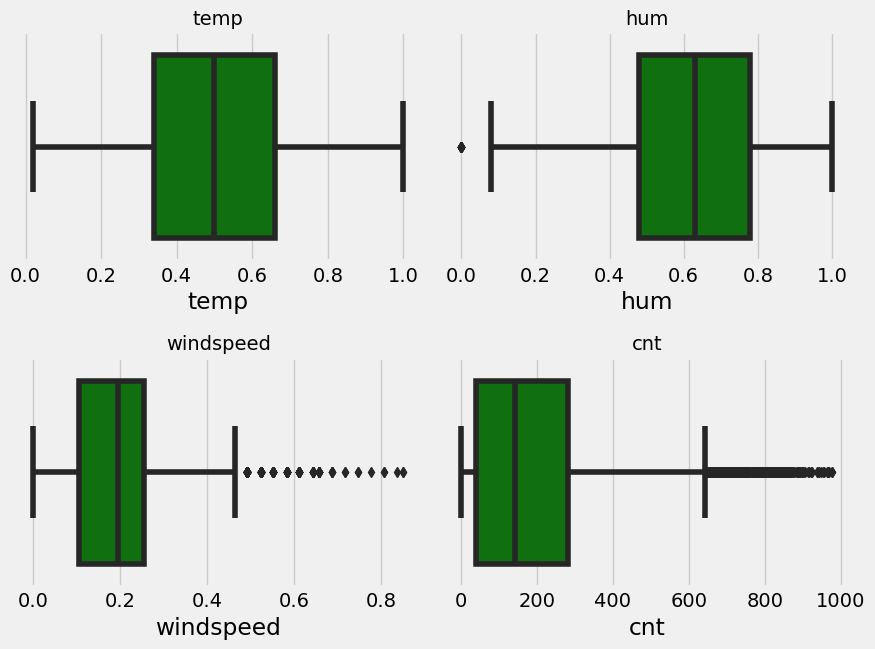

In [9]:
#on vérifie s'il y a des valeurs aberrantes

cols = ['temp', 'hum', 'windspeed', 'cnt']

fig, axs = plt.subplots(2, 2,figsize=(9, 7), sharey=True)

# Tracer un subplot de boîte à moustache pour chaque axe
for i, variable in enumerate(cols):
    row = i // 2
    col = i % 2
    axs[row, col].set_title(f"{variable}", fontsize=14)
    sns.boxplot(x=variable, data=data, ax=axs[row, col], color = 'green')
    
# Ajustements d'espacement entre les sous-graphiques    
plt.tight_layout(rect=[0, 0, 1, 0.96])    

# Afficher le graphique
plt.show()

Nous observons la présence de quelques valeurs abérantes, notament sur la variable windspeed. Après documentation, nous nous sommes rendues compte que le nombre de vélos loués est également corrélé à certains événements de la ville comme l'ouragan Sandy. Tous ses évènements sont facilement repérables via les moteurs de recherche google. 

Par exemple, une requête comme **2012-10-30 washington DC**  dans Google renvoie des résultats liés à l'ouragan Sandy. 

Au vue de l'ampleur des évènements provoquant la présence de ses valeurs abérantes, nous décidons de toutes les supprimées dans cette partie.

In [10]:
 # Fonction permettant de creer un dataset sans valeurs aberrantes 
def outliers(dataset, columns_to_check):
    filtered_data = dataset.copy()

    # Identifier les valeurs aberrantes en utilisant la règle du boxplot et l'IQR
    for column in columns_to_check:
        q1 = dataset[column].quantile(0.25)
        q3 = dataset[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        outliers_mask = (dataset[column] < lower_bound) | (dataset[column] > upper_bound)

        # Filtrer les observations aberrantes du dataset copié
        filtered_data = filtered_data[~outliers_mask]

    # Récupérer les observations aberrantes
    outliers_data = dataset[~dataset.index.isin(filtered_data.index)]

    return filtered_data, outliers_data

data, data_out = outliers(data, cols)
print('Dimension du datset sans valeurs abérrantes : ', data.shape)
print('Dimension du datset avec valeurs abérrantes : ', data_out.shape)

Dimension du datset sans valeurs abérrantes :  (16522, 14)
Dimension du datset avec valeurs abérrantes :  (857, 14)


## Visualisation des données

Pour mieux comprendre les facteurs qui influence la demande de vélos, nous allons procéder à une visualisation des données, en faisant des croisement entre la variable cible **cnt** et les différentes variables explicatives.

### Evolution de la demande de vélo par jour

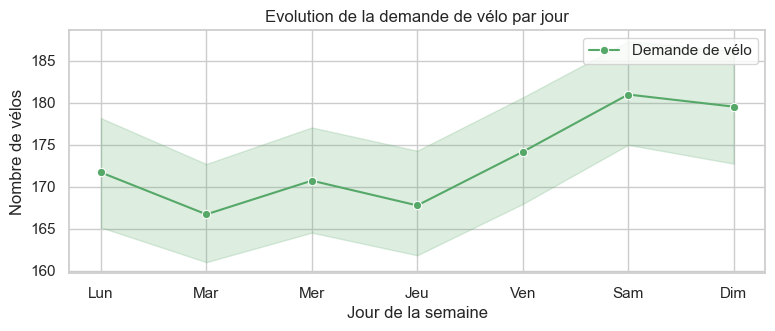

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 3))

sns.lineplot(x="weekday", y="cnt", data=data, label="Demande de vélo", marker='o', color='g')
plt.xticks(range(7), ['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim'])
plt.xlabel("Jour de la semaine")
plt.ylabel("Nombre de vélos")
plt.title("Evolution de la demande de vélo par jour")
plt.legend()
plt.show()

Nous remarquons que la demande de vélos est moins forte de lundi au jeudi.A partir de jeudi, la demande croît de façons exponentielle jusqu'à samedi où elle atteint son pic puis, décroît le dimanche.

### Evolution de la demande de vélo par mois

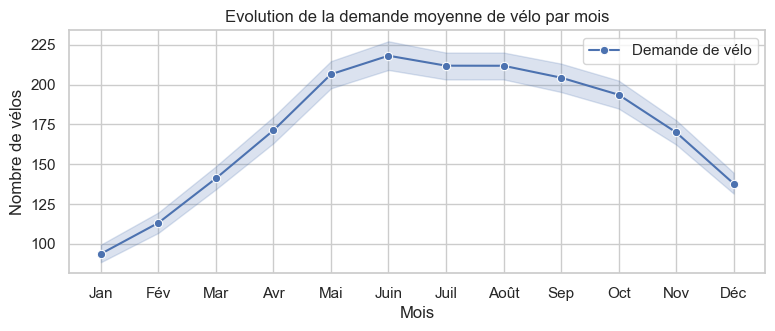

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 3))

sns.lineplot(x="mnth", y="cnt", data=data, label="Demande de vélo", marker='o', color='b')
plt.xticks(range(1, 13), ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])
plt.xlabel("Mois")
plt.ylabel("Nombre de vélos")
plt.title("Evolution de la demande moyenne de vélo par mois")
plt.legend()
plt.show()

La demande de vélos atteint son pic en été : de juin à aôut. Cependant elle est moins forte pendant des autres
saisons, Notament en automne où elle décroît fortement

### Évolutionde la demande moyenne de vélo par saison

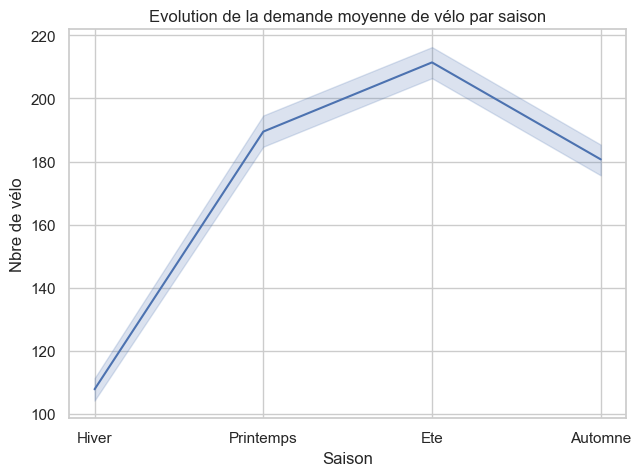

In [13]:
data_c = data.copy()
data_c["season"] = data_c["season"].map({1:"Hiver", 2 : "Printemps", 3: "Ete", 4:"Automne"})
sns.lineplot(x="season", y="cnt", data=data_c)

plt.xlabel("Saison")
plt.ylabel("Nbre de vélo")
plt.title("Evolution de la demande moyenne de vélo par saison")
plt.show()

La demande de vélos atteint son pic en été : de juin à aôut. Cependant elle est moins forte pendant des autres
saisons, Notament en automne où elle décroît fortement.

<div class="alert alert-block alert-info">
    <b>Récapitulatif : </b>
    Ces observations sont normales, car il est raisonnable de s’attendre à une demande plus élevée de vélos pendant les
périodes chaudes, les vacances ou les samedis, par rapport aux périodes froides, scolaires du lundi au vendredi (où la
plupart des gens sont à l’école ou au travail), ou les dimanches, moments où la majorité se repose chez soi ou participe
à des activités.
</div>

In [14]:
def barplot(cat_cols):
    for col in cat_cols:
        plt.figure(figsize=(20,7),dpi=150)
        ax=sns.barplot(x=data[col],y=data['cnt'],estimator=np.mean,errwidth=0,hue=data['yr'].map({0:2011, 1:2012}))
        for i in ax.containers:
            ax.bar_label(i,)


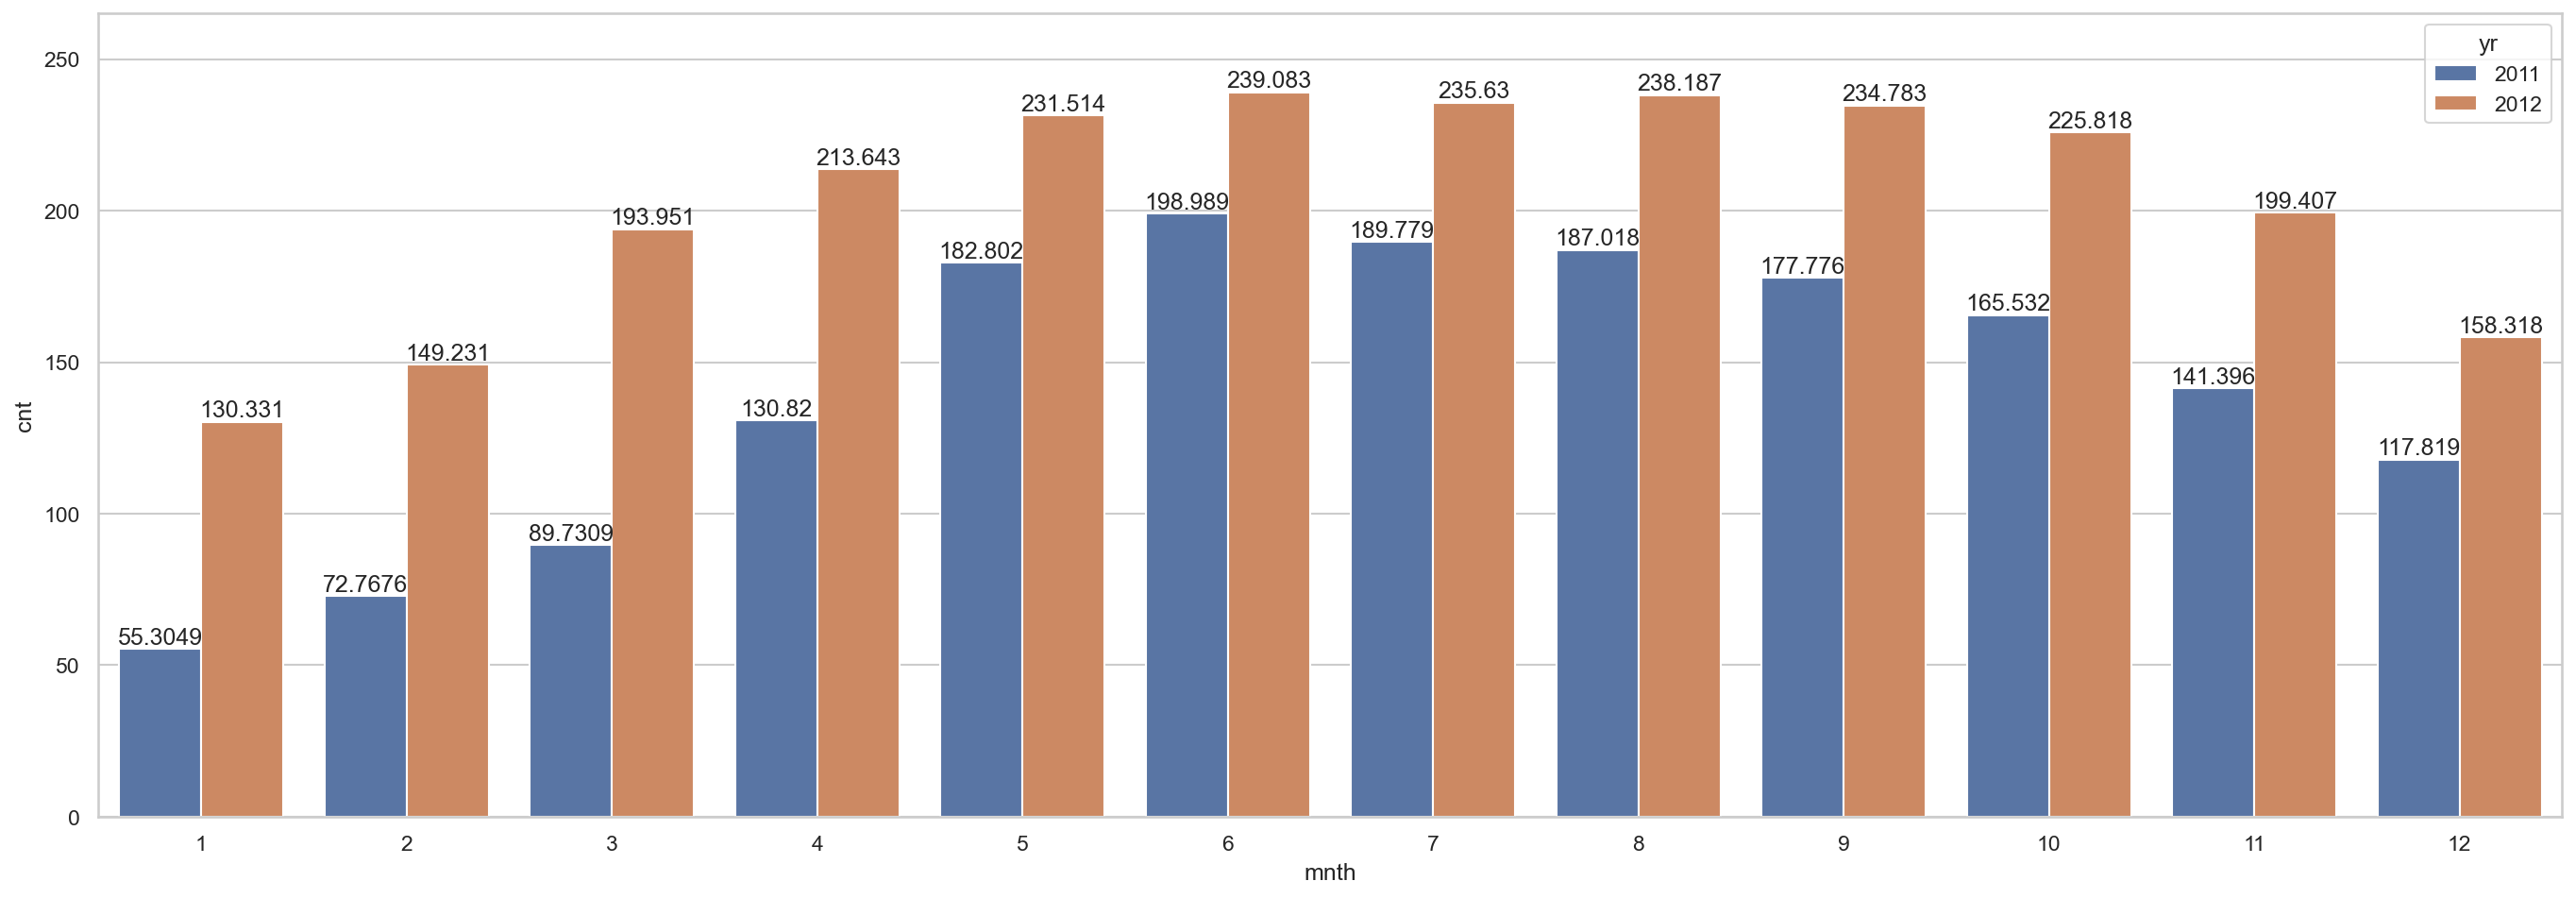

In [15]:
# Nbre de vélos empruntés en fonction du mois pour chaque mois
barplot(['mnth'])

On observe une augmentation globale de la demande en 2012 comparativement à 2011.

### Évolution de la demande moyenne  de vélos en fonction de la température

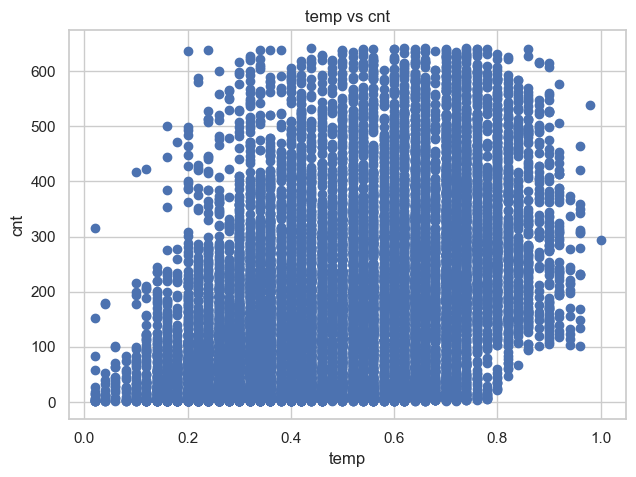

In [16]:
plt.scatter(x="temp",y= "cnt",data = data)
plt.grid(True)
plt.xlabel('temp')
plt.ylabel('cnt')
plt.title('temp vs cnt')
plt.show()

La demande de vélos augmente avec l'évolution de la température 

### Évolution de la demande moyenne  de vélos fonction de la variable windspeed

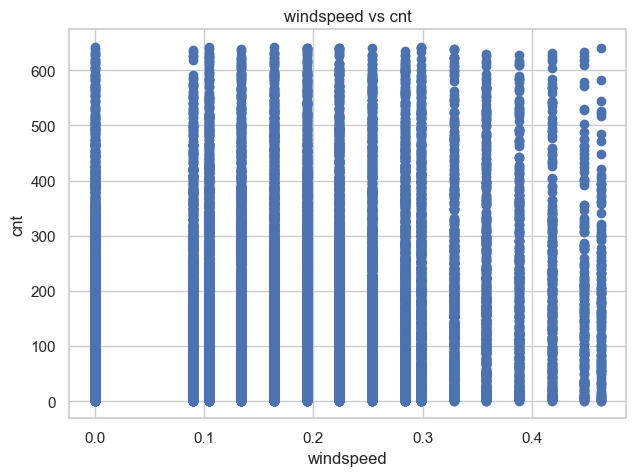

In [17]:
plt.scatter(x="windspeed",y= "cnt",data = data)
plt.grid(True)
plt.xlabel('windspeed')
plt.ylabel('cnt')
plt.title('windspeed vs cnt')
plt.show()

La demande de vélos est plus forte quand il n'y a pas de vent.

### Évolution de la demande moyenne de vélos fonction de la variable workingday

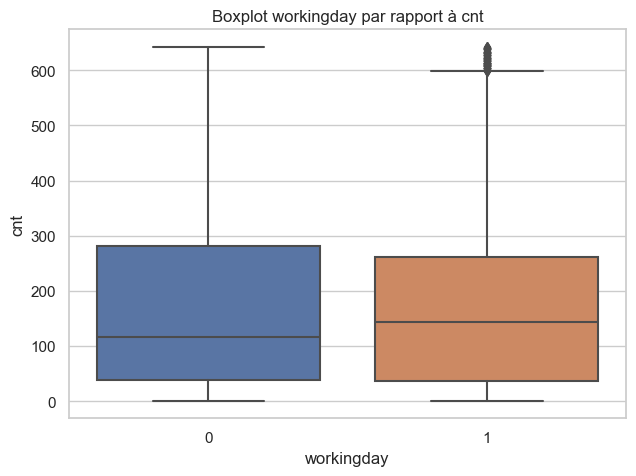

In [18]:
sns.boxplot(x='workingday', y='cnt', data=data)

plt.title('Boxplot workingday par rapport à cnt')
plt.show()

Il y a plus de demande de vélos pendant les jours non ouvrables par rapport aux jours ouvrables.

### Évolution de la demande moyenne  de vélos fonction des vacances

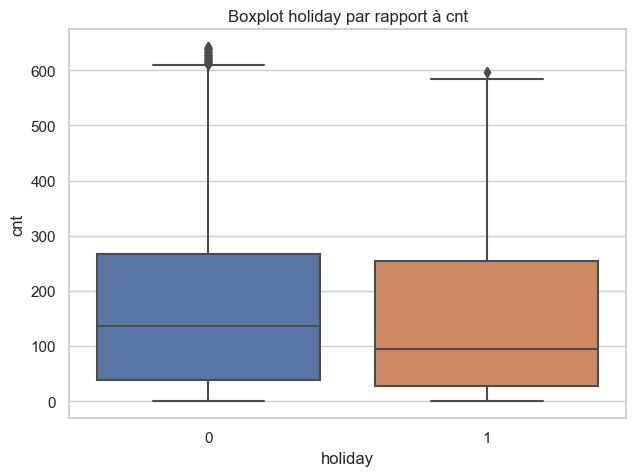

In [19]:
sns.boxplot(x='holiday', y='cnt', data=data)

plt.title('Boxplot holiday par rapport à cnt')
plt.show()

## Statistiques descriptives

In [20]:
print(data.columns)

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


In [21]:
data.describe() #Description des variables quantitatives

,dteday,temp,atemp,hum,windspeed,cnt
count,16522,16522.000000,16522.000000,16522.000000,16522.000000,16522.000000
mean,2011-12-28 18:03:40.070209280,0.493968,0.473471,0.634248,0.182329,173.089517
min,2011-01-01 00:00:00,0.020000,0.000000,0.080000,0.000000,1.000000
25%,2011-07-01 17:15:00,0.340000,0.333300,0.490000,0.104500,37.000000
50%,2011-12-23 10:30:00,0.500000,0.484800,0.640000,0.164200,135.500000
75%,2012-06-25 14:45:00,0.640000,0.621200,0.790000,0.253700,267.000000
max,2012-12-31 23:00:00,1.000000,1.000000,1.000000,0.462700,642.000000
std,NaN,0.192717,0.171625,0.190030,0.112087,155.470131


In [22]:
data.describe(include=['category']) #Description des variables catégorielles

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit
count,16522,16522,16522,16522,16522,16522,16522,16522
unique,4,2,12,24,2,7,2,4
top,3,0,12,7,0,0,1,1
freq,4266,8456,1440,725,16032,2434,11211,10798


In [23]:
#data.drop(['instant'], axis = 1, inplace = True) 

In [24]:
#Afin de mesurer l'intensité du lien entre les variables qualitatives et notre cible, on calcul le V de crammer
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None))
  stat = chi2_contingency(crosstab)[0]
  obs = np.sum(crosstab)
  mini = min(crosstab.shape)-1
  return np.sqrt(stat/(obs*mini))

In [25]:
V_cramer = []
variables_quali = ["season", "yr","hr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
for col in variables_quali :
    V_cramer.append(cramers_V(data[col], data.cnt))
cramer = pd.DataFrame(V_cramer, index = variables_quali, columns = ["cnt"]).sort_values(by = "cnt", ascending = False)
cramer

,cnt
hr,0.308501
yr,0.285834
season,0.262949
workingday,0.245099
mnth,0.219823
weekday,0.207153
holiday,0.190342
weathersit,0.187799


Text(0.5, 1.0, 'Carte des corrélation de Pearson')

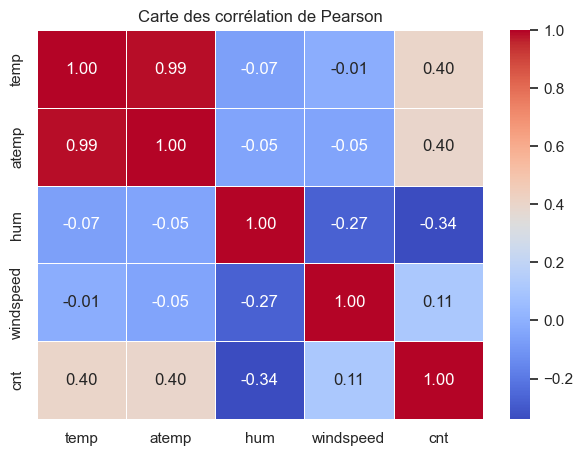

In [26]:
corr_matrix=data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title("Carte des corrélation de Pearson")

Afin d'améliorer la qualité de nos modèles, nous retirons les variables correlées. Ici **temp** et **atemp** ont une forte correalations. On choisit de retirer **atemp**.

In [27]:
data.drop(['atemp'], axis = 1, inplace = True)

### Autres métriques utilisées dans la suite du travail
### __________________________________________________________________________________________________


Erreur quadratique moyenne (MSE) , Ecart qudratique moyen (RMSE) et Erreur absolue moyenne (MAE):
    -la MSE, ou erreur quadratique moyenne, est la moyenne des carrés des erreurs, définie par la formule :
        <center>
$\begin{equation*} MSE = \frac{1}{n} \sum_{i=1}^n (y_i – \hat{y}_i)^2 \end{equation*} $
</center>
    -La RMSE, ou racine de l’erreur quadratique moyenne, est – comme son nom l’indique – la racine carrée de la MSE. Mathématiquement, elle est définie par : 

<center>
$\begin{equation*} RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i – \hat{y}_i)^2} \end{equation*}$
</center>
Ces deux métriques quantifient les erreurs réalisées par le modèle. Plus elles sont élevées, moins le modèle est performant.
    - La MAE est la métrique de régression la plus interprétable, ce qui en fait une métrique populaire malgré son manque de régularité.

La MAE, ou erreur absolue moyenne, est la moyenne des valeurs absolues des erreurs, définie par la formule :

In [28]:
from sklearn.metrics import mean_absolute_error

### Préparation des données

In [29]:
preprossed_dat = data.copy()

In [30]:
# On transforme les variables qualitatives en variables binaires.
preprossed_dat = pd.get_dummies(preprossed_dat, dtype = int)

preprossed_dat.head(3)

,dteday,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
instant,,,,,,,,,,,,,,,,,,,,,
1,2011-01-01 00:00:00,0.24,0.81,0.0,16,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
2,2011-01-01 01:00:00,0.22,0.80,0.0,40,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
3,2011-01-01 02:00:00,0.22,0.80,0.0,32,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0


### Séparation Train-Test 
(on veut prédire le dernier mois)

In [31]:
n_mois_test = 1
N = n_mois_test*30*24 #chaque jour a 24 observations correspondants à 24h, 6 mois fait donc N observations
n = preprossed_dat.shape[0]
data_train=preprossed_dat.head(n-N)
data_test=preprossed_dat.tail(N)

In [32]:
X_train = data_train.drop(['cnt', 'dteday'], axis = 1)
y_train = data_train['cnt']

X_test = data_test.drop(['cnt', 'dteday'], axis = 1)
y_test = data_test['cnt']

## Régression linéaire
La régression linéaire est une technique statistique qui cherche à établir une relation linéaire entre une variable, dite **expliquée**, et une ou plusieurs variables, dites **explicatives**. En d’autres termes, elle permet de modéliser une relation entre deux variables en traçant une droite qui représente le lien entre elles.
Cette technique est utilisée en statistiques, en économétrie et en apprentissage automatique.

Dans le contexte des séries temporelles, la régression linéaire est utilisée pour modéliser la relation entre une variable dépendante et une ou plusieurs variables indépendantes dans le temps.
La régression linéaire multiple est une extension de la régression linéaire simple qui permet de modéliser les relations entre plusieurs variables indépendantes et une variable dépendante.


## Prévision par des Régressions

In [33]:
from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression(fit_intercept=True)
reg_lin = reg_lin.fit(X_train, y_train)

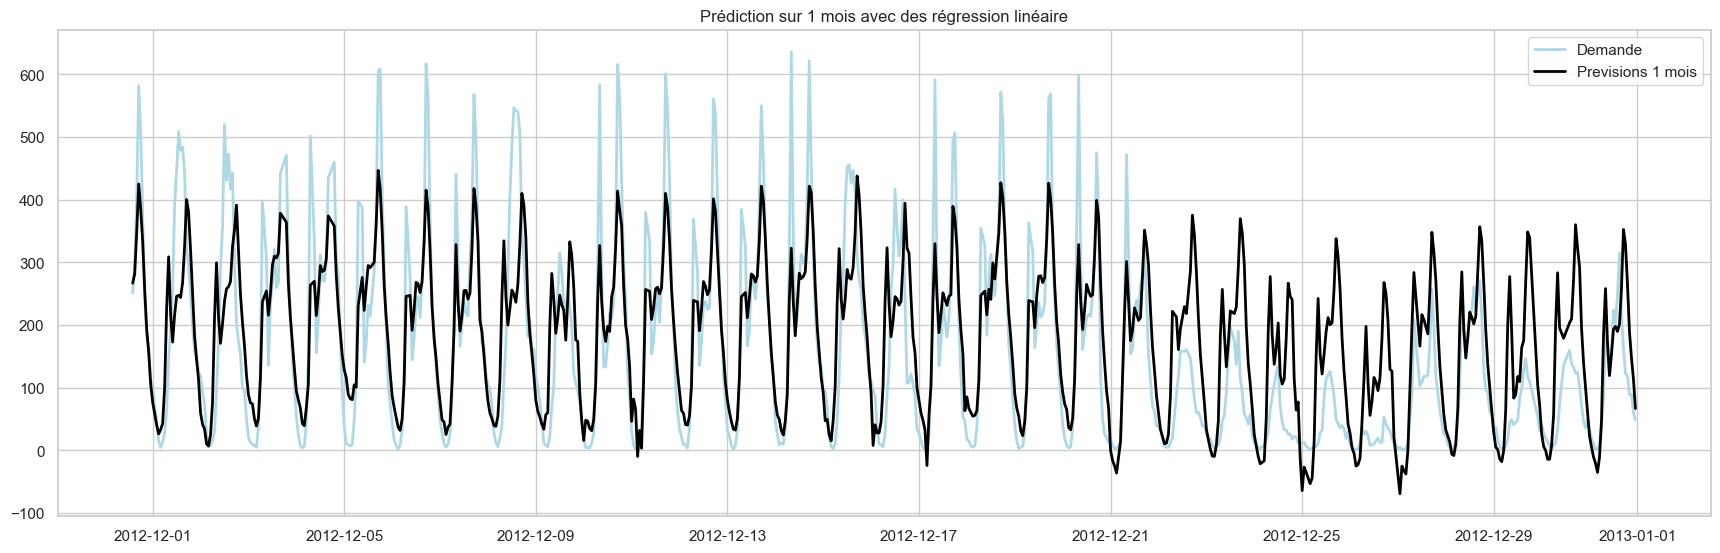

In [34]:
beta = reg_lin.coef_

data_train['Prevision_reg_lin'] = reg_lin.predict(X_train)
data_test['Prevision_reg_lin']  = reg_lin.predict(X_test)

plt.figure(figsize=(19,6))
plt.plot(data_test['dteday'], data_test['cnt'], label='Demande', color='lightblue', lw=2)
plt.plot(data_test['dteday'], data_test['Prevision_reg_lin'],label='Previsions '+str(n_mois_test)+' mois', color='black', lw=2)
plt.title('Prédiction sur 1 mois avec des régression linéaire')
plt.legend()
plt.show()

In [35]:
# MAE for Linear Regression
mae_train_regression = mean_absolute_error(data_train['cnt'], data_train['Prevision_reg_lin'])
mae_test_regression = mean_absolute_error(data_test['cnt'], data_test['Prevision_reg_lin'])

print(f'The MAE in estimation is {mae_train_regression:.2f}.')
print(f'The MAE in prediction is {mae_test_regression:.2f}.')

The MAE in estimation is 66.41.
The MAE in prediction is 68.98.


## Gradient boosting

Le Gradient Boosting est un algorithme particulier de Boosting(par exemple XGboost, AdaBoost,...). Le Boosting consiste à assembler plusieurs « weak learners » pour en faire un « strong learner », c’est-à-dire assembler plusieurs algorithmes ayant une performance peu élevée pour en créer un beaucoup plus efficace et satisfaisant, et il travaille de manière **séquentielle**

Chaque "weak learner" est entrainé pour **corriger les erreurs** du "weak learner" précédent

Cet algorithme est très puissant car il offre un moyen de régler beaucoup plus hyperparamètres que les modèles de boosting classiques. Il peut donc s'adapter à des données plus variées et répondre à différentes problématiques.


In [36]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=0)
gb = gb.fit(X_train, y_train)

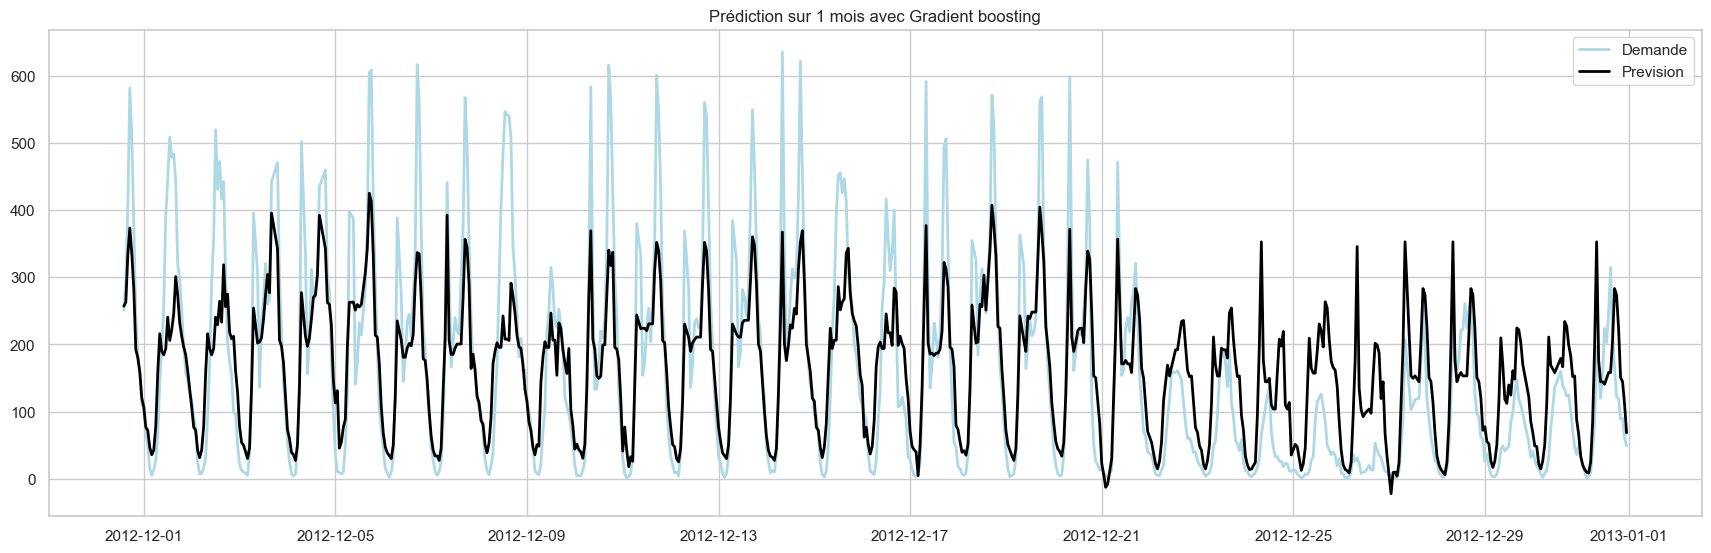

In [37]:
data_train['Prevision_gb'] = gb.predict(X_train)
data_test['Prevision_gb']  = gb.predict(X_test)

plt.figure(figsize=(19,6))
plt.plot(data_test['dteday'], data_test['cnt'], label='Demande', color='lightblue', lw=2)
plt.plot(data_test['dteday'], data_test['Prevision_gb'], label='Prevision', color='black', lw=2)
plt.title('Prédiction sur 1 mois avec Gradient boosting')
plt.legend()
plt.show()

In [38]:
# MAE for gradient boosting
mae_train_gb = mean_absolute_error(data_train['cnt'], data_train['Prevision_gb'])
mae_test_gb = mean_absolute_error(data_test['cnt'], data_test['Prevision_gb'])

print(f'The MAE in estimation is {mae_train_gb:.2f}.')
print(f'The MAE in prediction is {mae_test_gb:.2f}.')

The MAE in estimation is 54.19.
The MAE in prediction is 63.76.


## Models linéaires généralisés

Le modèle linéaire généralisé (MLG) est une généralisation souple de la régression linéaire. Il permet de généraliser la régression linéaire en permettant au modèle linéaire d’être relié à la variable réponse via une fonction lien et en autorisant l’amplitude de la variance de chaque mesure d’être une fonction de sa valeur prévue, en fonction de la loi choisie. Le modèle linéaire généralisé est souvent utilisé pour modéliser des variables binaires, des comptages, des durées, des proportions, des données de survie, etc.

In [39]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [40]:
glm_model = sm.GLM(y_train, X_train, family=sm.families.Poisson())
glm_results = glm_model.fit()
data_train['Prevision_glm'] = glm_results.predict(X_train)
data_test['Prevision_glm'] = glm_results.predict(X_test)

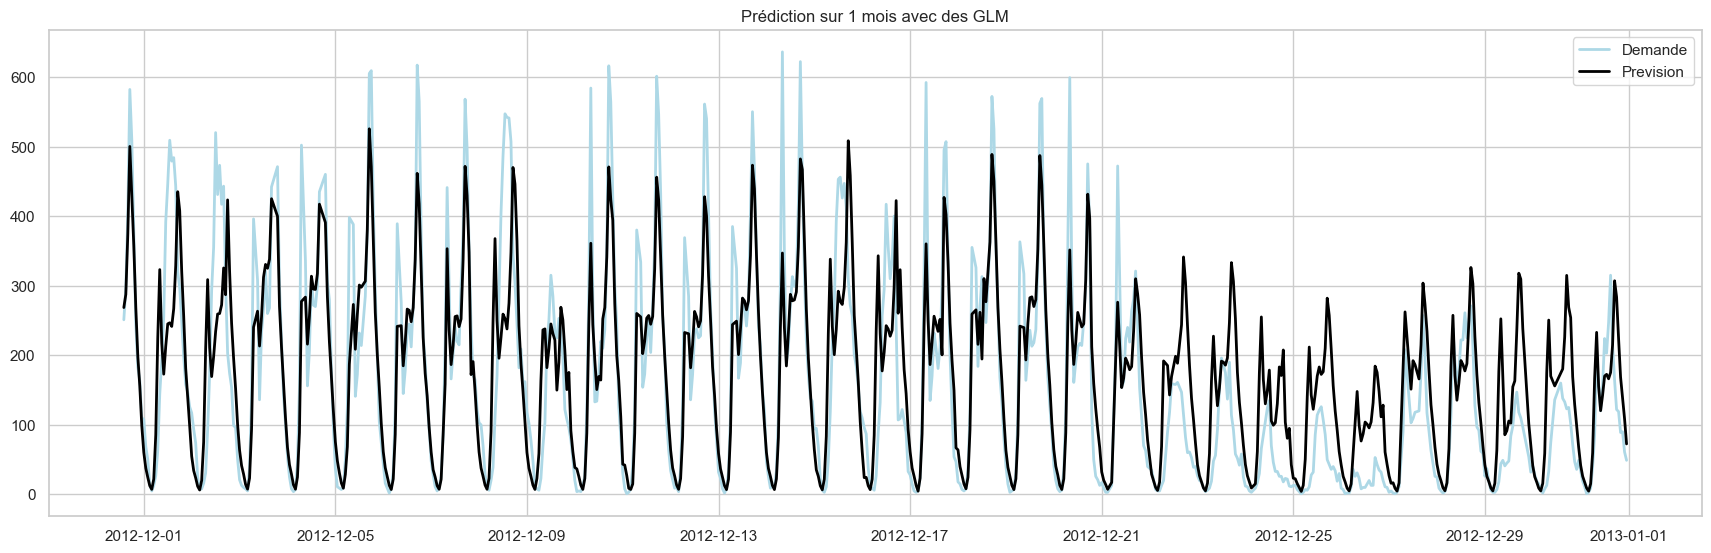

In [41]:
plt.figure(figsize=(19,6))
plt.plot(data_test['dteday'], data_test['cnt'], label='Demande', color='lightblue', lw=2)
plt.plot(data_test['dteday'], data_test['Prevision_glm'], label='Prevision', color='black', lw=2)
plt.title('Prédiction sur 1 mois avec des GLM')
plt.legend()
plt.show()

In [42]:
mae_train_glm = mean_absolute_error(data_train['cnt'], data_train['Prevision_glm'])
mae_test_glm = mean_absolute_error(data_test['cnt'], data_test['Prevision_glm'])

print(f'The MAE in estimation is {mae_train_glm:.2f}.')
print(f'The MAE in prediction is {mae_test_glm:.2f}.')

The MAE in estimation is 56.27.
The MAE in prediction is 59.13.


##  Random forest

Random Forest est une technique qui fait partie des méthodes d’ensemble. Elle combine les avantages de la méthode des sous-espaces aléatoires et du bagging pour obtenir une prédiction plus précise .

En termes simples, Random Forest crée plusieurs arbres de décision et les combine pour obtenir une prédiction plus précise. 

Chaque arbre de décision est construit en utilisant un sous-ensemble aléatoire des données d’entraînement et des variables d’entrée . Les prédictions de chaque arbre sont ensuite combinées pour obtenir une prédiction finale .
Il est souvent utilisé pour des tâches de classification et de régression.

Il y a beaucoup plus d'**hyperparamètres** pour un modèle RandomForest, nous allons utiliser ces deux hypermarametres **max_depth**  et  **n_estimators** pour notre jeu de test.

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [44]:
#X_train_modele = preprossed_dat.head(n-N).drop(['cnt','hum','dteday'], axis = 1)
#X_test_modele = preprossed_dat.tail(N).drop(['cnt','hum','dteday'], axis = 1)

randomForest = RandomForestRegressor()
randomForest = randomForest.fit(X_train, y_train)

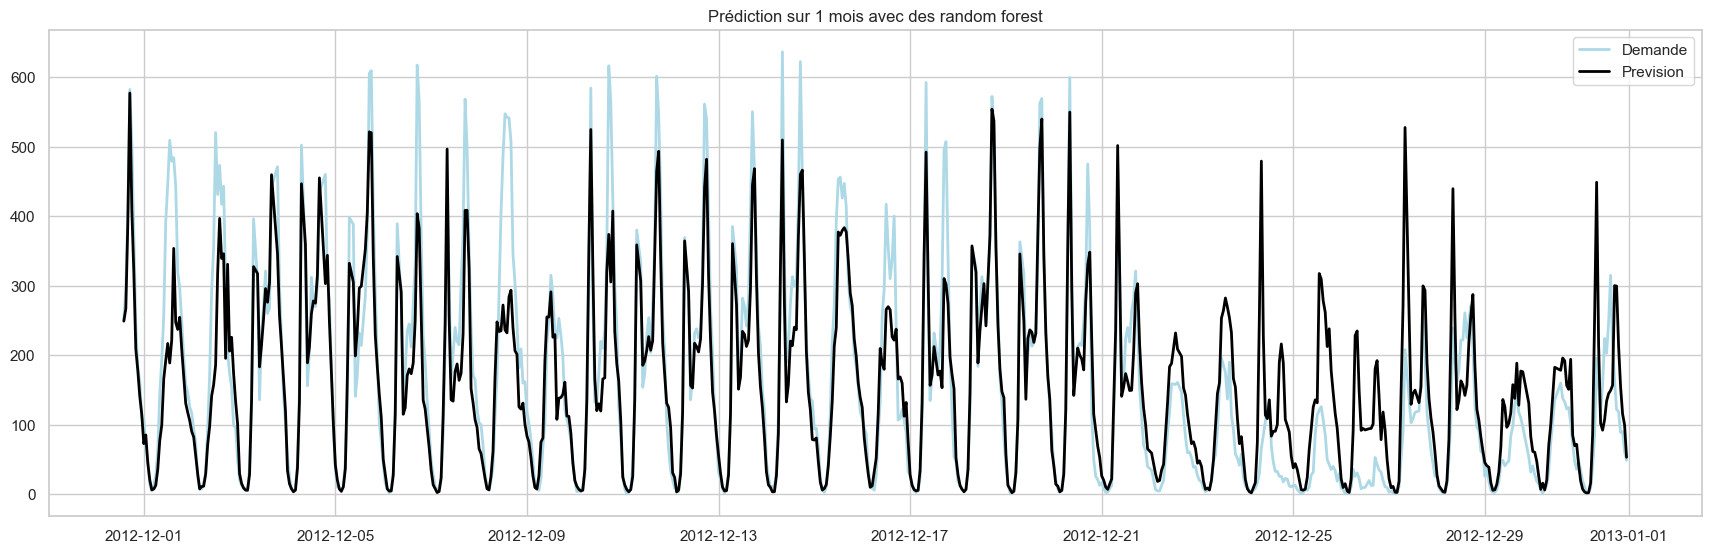

In [45]:
data_train['Prevision_rf'] = randomForest.predict(X_train)
data_test['Prevision_rf']  = randomForest.predict(X_test)

plt.figure(figsize=(19,6))
plt.plot(data_test['dteday'], data_test['cnt'], label='Demande', color='lightblue', lw=2)
plt.plot(data_test['dteday'], data_test['Prevision_rf'], label='Prevision', color='black', lw=2)
plt.title('Prédiction sur 1 mois avec des random forest')
plt.legend()
plt.show()

In [46]:
# MAE for random forest
mae_train_rf = mean_absolute_error(data_train['cnt'], data_train['Prevision_rf'])
mae_test_rf  = mean_absolute_error(data_test['cnt'], data_test['Prevision_rf'])

print(f'The MAE in estimation is {mae_train_rf:.2f}.')
print(f'The MAE in prediction is {mae_test_rf:.2f}.')

The MAE in estimation is 10.29.
The MAE in prediction is 47.21.


### Optimisation des hypers paramètres

On constate que le MMAE de notre ensemble d'entrainement est très différent de celui de notre ensemble de test, ce qui est caractéristique d'un surrappretissage. Nous souhaitons donc optimiser notre modèle en jouant avec les paramètres :
- **max_depth** qui réprésente la profondeur maximale des arbres de la forêt. nous allons donc réduire sa valeur pour pénaliser le modèle et ainsi diminuer le sureapprentissage;
- **n_estimators** qui réprésente le nombre d'arbres de la forêt.

In [47]:
regressor = RandomForestRegressor()

param_grid = {
    'n_estimators': [90, 100, 150],
    'max_depth': [3, 5, 10]
}

grid_search = GridSearchCV(regressor, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres:", grid_search.best_params_)

Meilleurs paramètres: {'max_depth': 10, 'n_estimators': 150}


In [48]:
# Retourne le modèle avec les meilleurs paramètres
meilleur_modele = grid_search.best_estimator_

data_train['Prevision_best_rf'] = meilleur_modele.predict(X_train)
data_test['Prevision_best_rf']  = meilleur_modele.predict(X_test)

mae_train_best_rf = mean_absolute_error(data_train['cnt'], data_train['Prevision_best_rf'])
mae_test_best_rf = mean_absolute_error(data_test['cnt'], data_test['Prevision_best_rf'])

print(f'The MAE in estimation is {mae_train_best_rf:.2f}.')
print(f'The MAE in prediction is {mae_test_best_rf:.2f}.')


The MAE in estimation is 53.95.
The MAE in prediction is 70.34.


### Choix du meilleur modèle

In [49]:
data = {
    'Model': ['Linear Regression', 'Gradient Boosting', 'GLM', 'Random Forest'],
    'mae_train': [mae_train_regression, mae_train_gb, mae_train_glm, mae_train_best_rf],
    'mae_test': [mae_test_regression, mae_test_gb,  mae_test_glm, mae_test_best_rf]
}

df = pd.DataFrame(data)
df.set_index('Model', inplace=True)
df

,mae_train,mae_test
Model,,
Linear Regression,66.406562,68.983333
Gradient Boosting,54.191432,63.762006
GLM,56.270752,59.134069
Random Forest,53.945478,70.337278


On retient donc les Random forest et Gradient Boosting pour lesquels les mmae sont les plus faibles.

## Approche online du random forest

Cette approche consite, à partir d'un random forest classique, à attribuer un poids à chaque arbre en fonction de sa qualité de prédiction.

Dans notre approche online, on choisit de determiner les poids optimaux avec une régression linéaire simple (une régression ridge et lasso ont été tentées mais les résultats n'étaient pas meilleurs).

Le passé lointain peut biaiser les predictions mais on ne peut pas non plus le retier car il contient de l'information. On décide donc d'accorder un poids important aux observations les plus récentes dans notre modele.

In [50]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
# On récupère les prédictions individuelles de chaque arbre
K = 100

rf = RandomForestRegressor(n_estimators=K, min_samples_leaf=15)
rf.fit(X_train, y_train)

mu = 0.999
batch_size = 48 * 7

data_online_train_rf = pd.DataFrame( data_train[['dteday','cnt']])
data_online_test_rf = pd.DataFrame(data_test[['dteday','cnt']])
for tree in range(K):
    data_online_train_rf['tree_' + str(tree)] = np.around(rf.estimators_[tree].predict(X_train),0)
    data_online_test_rf['tree_' + str(tree)] = np.around(rf.estimators_[tree].predict(X_test), 0)

In [52]:
# On fait des prédiction online basées sur une régression linéaire avec des poids
data_test_prev_online_rf = data_test.copy()
data_test_prev_online_rf['PrevisionOnline'] = np.nan

for t in range(1, (round(len(data_test) / batch_size) + 2)):
    
    if t == 1:
        data_online = data_online_test_rf.copy()
    else:
        data_online = pd.concat([
            data_online,
            data_online_test_rf[((t - 2) * batch_size):min(((t - 1) * batch_size), len(data_test))]]
        )
    # on cree des poids de plus en plus grands à mesure que l'on avance dans le temps
    weights = mu ** (len(data_online) - np.arange(1, len(data_online) + 1))
    reg_linW = LinearRegression()
    reg_linW.fit(data_online.drop(['dteday', 'cnt'], axis=1), data_online['cnt'], sample_weight=weights)

    df = data_online_test_rf[((t - 1) * batch_size):min((t * batch_size), len(data_test))]
    data_test_prev_online_rf['PrevisionOnline'][((t - 1) * batch_size):min((t * batch_size), len(data_test))] = reg_linW.predict(df.drop(['dteday', 'cnt'], axis=1))
   

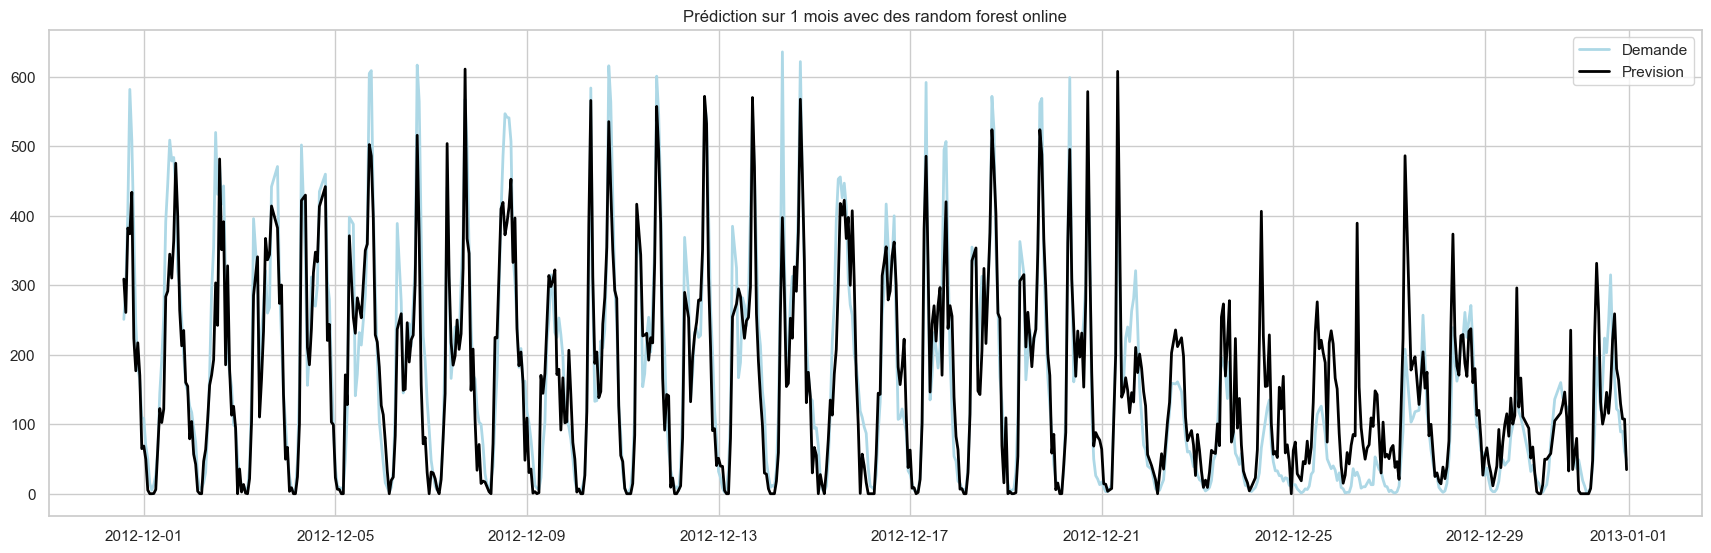

In [53]:
data_test_prev_online_rf['PrevisionOnline'] = np.maximum(data_test_prev_online_rf['PrevisionOnline'], 0)

plt.figure(figsize=(19,6))
plt.plot(data_test['dteday'], data_test['cnt'], label='Demande', color='lightblue', lw=2)
plt.plot(data_test['dteday'], data_test_prev_online_rf['PrevisionOnline'], label='Prevision', color='black', lw=2)
plt.title('Prédiction sur 1 mois avec des random forest online')
plt.legend()
plt.show()

In [54]:
mae_online_weighted_rf = mean_absolute_error(data_test_prev_online_rf['cnt'], data_test_prev_online_rf['PrevisionOnline'])

print(f"The MAE in prediction for weighted random forest is {mae_online_weighted_rf}.")

The MAE in prediction for weighted random forest is 48.85743236494744.


On voit visuellement que notre approche donne un resultat visuel plus coherent. Les tendances et saisonnalités de nos données sont respectées. De plus, cette approche améliore les résultats du random forest sur le test et il s'agit du meilleur score jusqu'à présent.

## Approche online du gradient boosting

Ici encore le principe est similaire à l'approche online faites avec les randoms forest. La seule différence réside dans le fait que dans cet algorithme, chaque arbre est construit itérativement de façon à prédire les erreurs du précédent (ils ne sont donc pas indépendant comme avant). L'approche online consitera donc à construire chaque nouvel arbre de façon à prédire les erreurs du précédent en **donnant des poids plus élevés pour les années récentes**.

In [55]:
xgb = GradientBoostingRegressor()
xgb.fit(data_train.drop(['cnt', 'dteday'], axis=1), data_train['cnt'])
features = X_train.columns.tolist()

data_online_train_gb = pd.DataFrame(data_train[['dteday','cnt']+features])
data_online_test_gb = pd.DataFrame(data_test[['dteday','cnt']+features])

data_online_train_gb['prev'] = xgb.predict(data_train.drop(['cnt', 'dteday'], axis=1))
data_online_train_gb['res']  = data_online_train_gb['cnt'] - data_online_train_gb['prev'] 

data_online_test_gb['prev'] = xgb.predict(data_test.drop(['cnt', 'dteday'], axis=1))
data_online_test_gb['res']  = data_online_test_gb['cnt'] - data_online_test_gb['prev']

In [56]:
data_test_prev_online_gb = data_test.copy()
data_test_prev_online_gb['PrevisionOnline'] = np.nan

for t in range(1, (round(len(data_test) / batch_size) + 2)):
    
    if t == 1:
        data_online = data_online_train_gb.copy()
    else:
        data_online = pd.concat([
            data_online,
            data_online_test_gb[((t - 2) * batch_size):min(((t - 1) * batch_size), len(data_test))]]
        )

    cart = DecisionTreeRegressor()
    cart.fit(data_online.drop(['dteday', 'cnt', 'res', 'prev'], axis=1), data_online['res'])

    weights = mu ** (len(data_online) - np.arange(1, len(data_online) + 1))
    cart_W = DecisionTreeRegressor()
    cart_W.fit(data_online.drop(['dteday', 'cnt', 'res', 'prev'], axis=1), 
               data_online['res'], 
               sample_weight=weights)
    
    df = data_online_test_gb[((t - 1) * batch_size):min((t * batch_size), len(data_test))]
    
    data_test_prev_online_gb['PrevisionOnline'][((t - 1) * batch_size):min((t * batch_size), len(data_test))] = cart_W.predict(df.drop(['dteday', 'cnt', 'res', 'prev'], axis=1)) + df['prev'].values

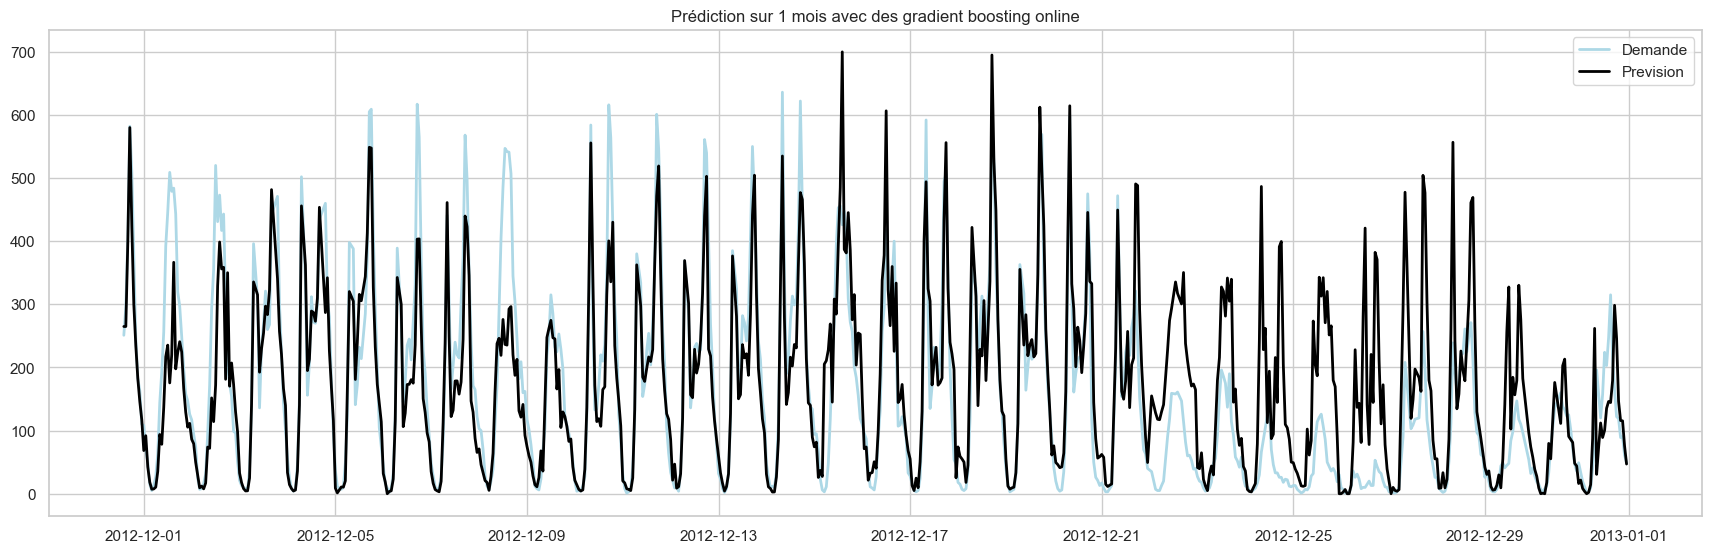

In [57]:
data_test_prev_online_gb['PrevisionOnline'] = np.maximum(data_test_prev_online_gb['PrevisionOnline'], 0)
plt.figure(figsize=(19,6))
plt.plot(data_test['dteday'], data_test['cnt'], label='Demande', color='lightblue', lw=2)
plt.plot(data_test['dteday'], data_test_prev_online_gb['PrevisionOnline'], label='Prevision', color='black', lw=2)
plt.title('Prédiction sur 1 mois avec des gradient boosting online')
plt.legend()
plt.show()

In [58]:
mae_online_weighted_gb = mean_absolute_error(data_test_prev_online_gb['cnt'], np.maximum(data_test_prev_online_gb['PrevisionOnline'], 0))

print(f"The MAE in prediction for gradient boosting is {mae_online_weighted_gb}.")

The MAE in prediction for gradient boosting is 60.3237739574358.


Les performances du Gradient Boosting se sont légèrement améliorées, mais il n'arrive toujours pas à bien prédire la période des fêtes de fin d'année

# Analyses avec d'autres métriques  et choix du modèle final

In [82]:
# Ajout de MSE
results_test = {'model': ['LinearRegression','Random Forest', 'Gradient boosting', 'GLM',
                          'online-Gradient boosting','online-Random Forest']}

In [83]:
# Ajout des MSE

mse_test_rf = mean_squared_error(data_test['cnt'], data_test['Prevision_rf'])
mse_test_reg_lin = mean_squared_error(data_test['cnt'], data_test['Prevision_reg_lin'])
mse_test_xgb = mean_squared_error(data_test['cnt'], data_test['Prevision_gb'])
mse_test_glm = mean_squared_error(data_test['cnt'], data_test['Prevision_glm'])

mse_test_online_rf = mean_squared_error(data_test_prev_online_rf['cnt'], data_test_prev_online_rf['PrevisionOnline'])
mse_test_online_xgb = mean_squared_error(data_test_prev_online_gb['cnt'], data_test_prev_online_gb['PrevisionOnline'])


results_test['MSE'] =  [mse_test_reg_lin, mse_test_rf, 
                        mse_test_xgb, mse_test_glm,
                        mse_test_online_xgb, mse_test_online_rf]   

In [84]:
 # Ajout des RMSE

rmse_test_rf = np.sqrt(mse_test_rf)
rmse_test_reg_lin = np.sqrt(mse_test_reg_lin)
rmse_test_xgb = np.sqrt(mse_test_xgb)
rmse_test_glm = np.sqrt(mse_test_glm )

rmse_test_online_rf = np.sqrt(mse_test_online_rf)
rmse_test_online_xgb= np.sqrt(mse_test_online_xgb)

results_test['RMSE'] = [rmse_test_reg_lin, rmse_test_rf, 
                        rmse_test_xgb, rmse_test_glm,
                        rmse_test_online_xgb, rmse_test_online_rf]

In [85]:
# Ajout des MAE
results_test['MAE'] =  [mae_test_regression, mae_test_rf, 
                        mae_test_gb, rmse_test_glm,
                        mae_online_weighted_gb, mae_online_weighted_rf]   

In [86]:
# Calcul des variances

# ---
var_rf = np.var(data_test['Prevision_rf'])
var_xgb = np.var(data_test['Prevision_gb'])
var_glm = np.var(data_test['Prevision_glm'])
var_reg_lin = np.var(data_test['Prevision_reg_lin'])
var_online_rf = np.var(data_test_prev_online_rf['PrevisionOnline'])
var_online_xgb = np.var(data_test_prev_online_gb['PrevisionOnline'])

# Stockage des biais dans la variable results_test
results_test['Variance'] = [var_rf, var_reg_lin, var_xgb, var_glm, var_online_rf, var_online_xgb]

In [87]:
df_results_test = pd.DataFrame(results_test).set_index('model')
df_results_test.sort_values(by="MAE", ascending = True)

,MSE,RMSE,MAE,Variance
model,,,,
Random Forest,5325.210101,72.974037,47.209483,13503.894131
online-Random Forest,4610.081211,67.897579,48.857432,19354.412125
online-Gradient boosting,8557.872498,92.508770,60.323774,18748.586402
Gradient boosting,7746.700398,88.015342,63.762006,8982.082711
LinearRegression,8964.992361,94.683644,68.983333,15518.124752
GLM,7091.106845,84.208710,84.208710,14677.811969


On constate que, comparativement à toutes les métriques, l'approche online des random forest donnent de meilleurs résultats.

## Features importance

On affiche les variables les plus influente du modèle choisit. Nous rappelons que notre choix est le random forest online construit à part du random forest.

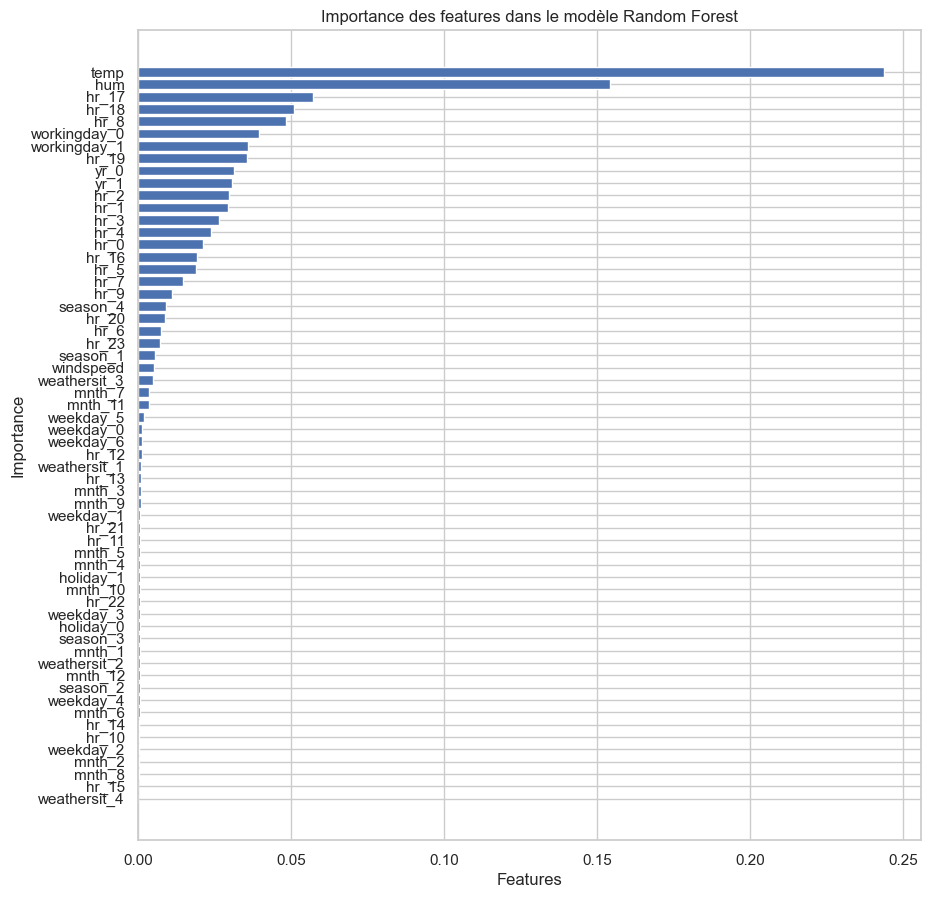

In [65]:
importances = meilleur_modele.feature_importances_

# Récupérer les noms des features
feature_names = features

# Trier les importances et les noms des features par ordre décroissant des importances
sorted_indices = np.argsort(importances)[::1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = np.array(feature_names)[sorted_indices]

# Afficher les importances des features sous forme de barres
plt.figure(figsize=(9,10))
plt.barh(range(X_train.shape[1]), sorted_importances, tick_label=sorted_feature_names)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Importance des features dans le modèle Random Forest')
plt.show()

- Les facteurs influençant la demande de velo sont bien évidement liées à la météo (température et humidité). 

- L'heure joue également un role particulièrement important. On constate par exemple que les heures entre 17- 19h et 08h sont les plus importantes. Cela peut s'expliquer par le fait qu'il s'agit d'heures de pointe où tout le monde rentre/part du boulot/ecole etc.

## Analyse des résidus

Analysons maintenant les résidus du modèle final choisi :

In [66]:
res_online_rf = data_test_prev_online_rf['cnt'] - data_test_prev_online_rf['PrevisionOnline']

## Dispersion autour de 0 des résidus

In [67]:
def smooth(x,y, box_percent=0.05,res=50,median=True):
    surface = max(x)-min(x)
    my_pas = np.arange(min(x),max(x),surface/res)
    box = surface*box_percent
    demi_box = box/2
    y_sortie = np.array([])
    x_sortie = np.array([])
    
    for myx in my_pas :
        temp = [y[i] for i in range(len(x)) if ((x[i]>=(myx-demi_box))and(x[i]<=(myx+demi_box)))]
        if median==True :
            temp_y = np.median(temp)
        else :
            temp_y = np.mean(temp)

        y_sortie = np.append(y_sortie,temp_y)
        x_sortie = np.append(x_sortie,myx)

    return x_sortie, y_sortie

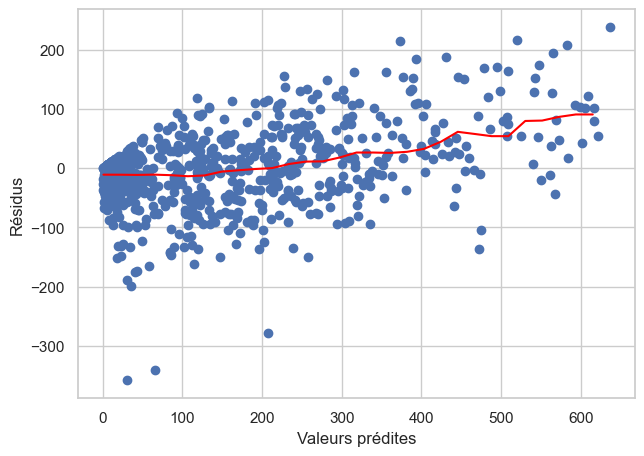

In [68]:
predicted_values_online_rf = data_test_prev_online_rf['cnt']
#res_online_rf = data_test_prev_online_rf['PrevisionOnline']
  
plt.scatter(predicted_values_online_rf, res_online_rf)

plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")

x, y = smooth(predicted_values_online_rf.values, 
                 res_online_rf.values, 
                 box_percent=0.25, 
                 res=30)
plt.plot(x, y, color="red")

plt.show()

Ce graphique montre que les résidus sont distribués de manière aléatoire autour de 0. Cela signifie que la forêt
aléatoire est bien adaptée aux données. Cependant la présence de quelques points bleus qui s’écartent de la ligne rouge
indique que le modèle a fait une erreur importante sur ces observations. Il serait intéréssant d’examiner ces observations
pour comprendre pourquoi le modèle a fait une erreur.

## Indépendance des résidus

Le test de Durbin-Watson est un test statistique utilisé pour détecter la présence d'autocorrélation dans les résidus d'un modèle de régression ou de séries temporelles. L'autocorrélation se produit lorsque les observations d'une série sont corrélées avec elles-mêmes à différents moments dans le temps. Ce test est particulièrement utilisé dans le contexte des séries temporelles, mais il peut également être appliqué à des modèles de régression classiques.

La statistique de test de Durbin-Watson est calculée comme suit :

$$d=\dfrac{\sum_{i=2}^{n}(e_i - e_{i-1})^2}{\sum_{i=2}^{n} e_i^2}$$

Où :


- $e_i$ sont les résidus du modèle
- n est le nombre d'observations.

La statistique d varie entre 0 et 4. Une valeur de d proche de 2 suggère l'absence d'autocorrélation dans les résidus (une valeur idéale est 2), tandis que des valeurs significativement inférieures à 2 ou supérieures à 2 peuvent indiquer une autocorrélation positive ou négative, respectivement.


On utilise Le test de **Durbin-Watson** afin de tester l'auto correlation des résidus. On rappelle qu'il s'agit d' un test statistique destiné à déterminer l'indépendance des résidus. 

La statistique de Durbin et Watson est une valeur appartenant à l’intervalle [0;+4]. Elle est dite normale si elle avoisine la valeur 2. 

In [69]:
from statsmodels.stats.stattools import durbin_watson
print(durbin_watson(res_online_rf))

0.9116762082807852


Puisque la p value est superieur au seuil 0.05, nous concluons que les résidus ne sont pas indépendants.

## Normalité des résidus

In [70]:
import math

res_online_rf_std = res_online_rf / math.sqrt(sum(res_online_rf**2)/(len(res_online_rf)-1))


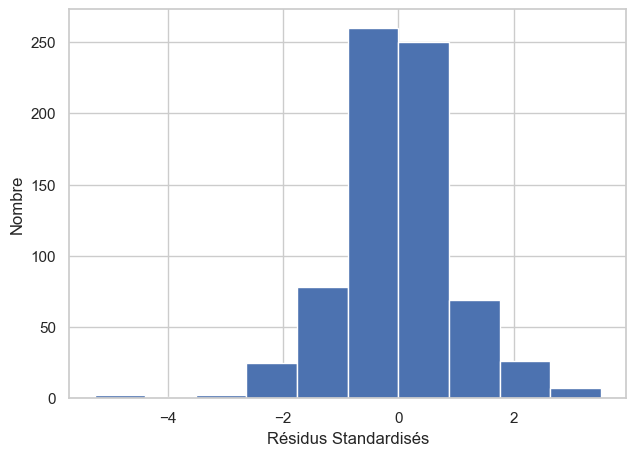

In [71]:
plt.hist(res_online_rf_std)
plt.ylabel('Nombre')
plt.xlabel('Résidus Standardisés')

plt.show()

L’histogramme des résidus ressemble fortement à celui d’une distribution gaussienne mais présente une légère
asymétrie avec une queue plus longue à droite qu’à gauche, cela peut indiquer que les résidus suivent globalement
une distribution normale, mais avec une légère violation de la symétrie. Cependant cette légère asymétrie n’a pas de
conséquences majeures sur les performances de la forêt aléatoire car les prédictions restent globalement fiables, à
hauteur d’un MAE = 32 sur les données de généralisatiions.

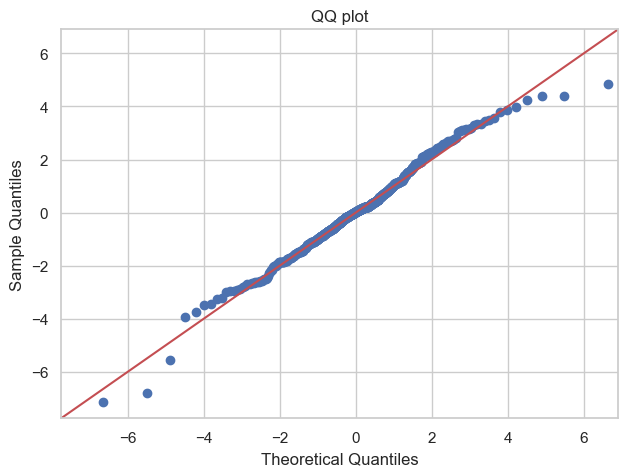

In [72]:
# Diagramme Quantile-Quantile

import statsmodels.api as sm
import scipy.stats as stats

fig = sm.qqplot(res_online_rf_std, stats.t, fit=True,line='45')
plt.title("QQ plot")

plt.show()

Le graphique suggère que les données suivent une loi normale mais déformée sur les côtés. Cela confime l'asymétrie de l'histogram.

#### Test d’Anderson-Darling

Le test d'Anderson-Darling est un test statistique utilisé pour évaluer si un échantillon de données suit une distribution particulière, généralement la distribution normale. Contrairement au test de Shapiro-Wilk, l'Anderson-Darling est adapté pour des échantillons de taille plus importante.

$$A^2 = -\frac{n}{72} \sum_{i=1}^n \left( \ln \left( F(X_i) \right) + \ln \left( 1 - F(X_{n+1-i}) \right) \right)$$

Où :

- $x_{i}$ est la i-ème plus petite valeur observée
    
- $F(X_i)$ est la fonction de distribution empirique des données
    
- $X_i$ est la i-ème plus petite valeur de l'échantillon trié
    
- n est le nombre d'observations.

La statistique $A^2$ suit une distribution spécifique sous l'hypothèse nulle de normalité. La formule mathématique peut sembler complexe, mais elle est basée sur la comparaison entre les valeurs observées et les valeurs attendues sous la distribution normale. Plus précisément, la statistique de test pénalise davantage les écarts importants entre les observations et ce qui serait attendu d'une distribution normale.

La décision sur le rejet ou non de l'hypothèse nulle dépend des seuils critiques associés à différents niveaux de signification $(1\%, 2.5\%, 5\%, 10\%, etc.)$. Si la statistique $A^2$ dépasse le seuil critique, l'hypothèse nulle est rejetée, indiquant que les données ne suivent pas la distribution normale.


In [73]:
from scipy.stats import anderson
result = anderson(res_online_rf)

In [74]:
# La statistique de test et les seuils critiques pour différents niveaux de signification

print('Statistic:', result.statistic)
print('Critical Values:', result.critical_values)

Statistic: 5.688859868377222
Critical Values: [0.573 0.652 0.783 0.913 1.086]


In [75]:
# Interprétation en fonction de la statistique de test et des seuils critiques

if result.statistic > result.critical_values[2]:  # Seuil de 5%
    print("Hypothèse nulle rejetée. Les données ne suivent pas une distribution normale.")
else:
    print("Hypothèse nulle acceptée. Les données suivent une distribution normale.")

Hypothèse nulle rejetée. Les données ne suivent pas une distribution normale.


## Analyse de l'homoscedasticité des résidus

L’homoscedasticite ou la variance constante des résidus permet de dire que les erreurs de prédiction sont constantes.
Sinon ça voudrait dire que le modèle ne capture pas correctement les relations entre les variables. Elle est souvent
importante dans le cadre de modélisation statistique et de régression lineéaire classique.
Cependant, pour les modèles de Random Forest, la situation est un peu différente par rapport aux modèles linéaires
classiques.

Dans un modèle de Random Forest, l’homoscédasticité n’est généralement pas une condition critique, car les résidus d’un arbre de décision individuel peuvent présenter des variations importantes en fonction des données d’entraînement. En d’autres termes, la structure complexe des arbres de décision dans un Random Forest peut naturellement
conduire à des résidus hétéroscédastiques comme nous pouvons l’observer sur nos données ci-après :

In [76]:
sqrt_res_online_rf_std = np.sqrt(np.abs(res_online_rf_std)) 

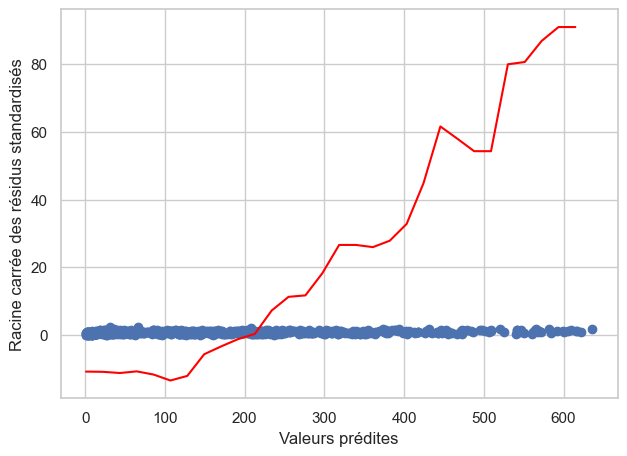

In [77]:
from matplotlib.pyplot import plot, scatter, show, xlabel, ylabel

plt.scatter(predicted_values_online_rf,sqrt_res_online_rf_std)

plt.xlabel("Valeurs prédites")
plt.ylabel("Racine carrée des résidus standardisés")

x, y = smooth(predicted_values_online_rf.values, 
                 res_online_rf.values, 
                 box_percent=0.25, 
                 res=30)
plt.plot(x, y, color="red")

plt.show()

Les Random Forests ont des propriétés robustes et peuvent gérer des relations complexes entre les caractéristiques
et la variable cible. Leur capacité à modéliser des non-linéarités et des interactions rend moins cruciale la satisfaction
des hypothèses classiques, telles que l’homoscédasticité. Nous nous contenterons donc des bons résultats de l’analyse
des résidus obtenus précédemment.